In [13]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [2]:
stroke_df=pd.read_csv('Resources/healthcare-dataset-stroke-data.csv')

In [3]:
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
#round glucose level column to 1 decimal place
stroke_df['avg_glucose_level'] = stroke_df['avg_glucose_level'].round(1)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.7,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.2,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.9,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.2,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.1,24.0,never smoked,1


In [5]:
# look at dtypes
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
stroke_df['age']=stroke_df['age'].astype(int)
stroke_df.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
#look at ID count and compare later
stroke_df['id'].count()

5110

In [8]:
#drop any null values from dataset
stroke_df.dropna(how='any', axis=0, inplace=True)
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.7,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.9,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.2,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.1,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.2,29.0,formerly smoked,1
6,53882,Male,74,1,1,Yes,Private,Rural,70.1,27.4,never smoked,1
7,10434,Female,69,0,0,No,Private,Urban,94.4,22.8,never smoked,1
9,60491,Female,78,0,0,Yes,Private,Urban,58.6,24.2,Unknown,1
10,12109,Female,81,1,0,Yes,Private,Rural,80.4,29.7,never smoked,1
11,12095,Female,61,0,1,Yes,Govt_job,Rural,120.5,36.8,smokes,1


In [9]:
# double check for null values
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#get rid of any duplicates
stroke_df.drop_duplicates(subset= 'id', keep='first', inplace=True)


In [11]:
#look at unique values 
stroke_df.nunique()

id                   4909
gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    1305
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [12]:
stroke_df['id'].count()
# removed 201 rows by dropping duplicates and NaN values

4909

<function matplotlib.pyplot.show(close=None, block=None)>

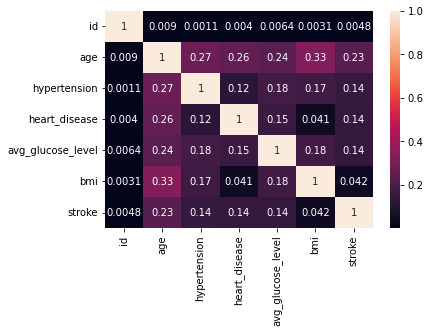

In [14]:
#try to make a correlation matrix to see of variables interact with eachother 
corrMatrix = stroke_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show

In [23]:
# make new dataframe and remove ID column and then make a new correlation matrix 
corr_df = stroke_df.drop('id', axis=1) 
corr_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.7,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.9,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.2,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.1,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.2,29.0,formerly smoked,1


<function matplotlib.pyplot.show(close=None, block=None)>

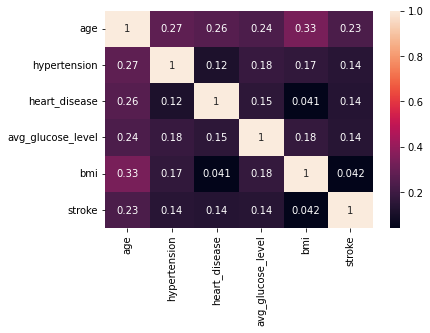

In [25]:
corrMatrix2 = corr_df.corr()
sn.heatmap(corrMatrix2, annot=True)
plt.show

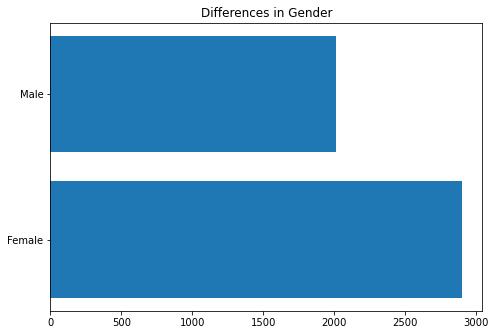

Percentage of Female Patients in Dataset: 0.5902607986960066
Percentage of Male Patients in Dataset: 0.4097392013039935


In [47]:
# look at differences in gender 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ["Female", "Male"]
x = corr_df["gender"].value_counts()['Female']
y = corr_df["gender"].value_counts()['Male']
counts = [x, y]
ax.barh(gender, counts)
plt.title("Differences in Gender")
plt.show()

print("Percentage of Female Patients in Dataset:", x/(x+y))
print("Percentage of Male Patients in Dataset:", y/(x+y))


Private: 2811 Self Employed: 775 Government Job: 630 Children: 671 Never Worked: 22


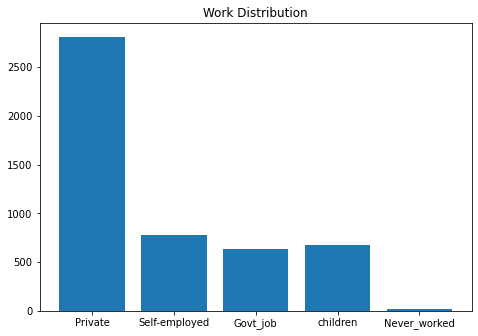

In [56]:
fig= plt.figure()
ax= fig.add_axes([0,0,1,1])
values = ["Private", "Self-employed","Govt_job", "children", "Never_worked"]

a = corr_df["work_type"].value_counts()["Private"]
b = corr_df["work_type"].value_counts()["Self-employed"]
c = corr_df["work_type"].value_counts()["Govt_job"]
d = corr_df["work_type"].value_counts()["children"]
e = corr_df["work_type"].value_counts()["Never_worked"]

counts = [a, b, c, d, e]

ax.bar(values, counts)
plt.title ("Work Distribution")
plt.show

print("Private:",private,
      "Self Employed:",self_employed,
      "Government Job:",govt_job, 
      "Children:",children,
      "Never Worked:",never_worked)